In [77]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score,precision_score,recall_score
from sklearn.metrics import classification_report
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers


# Load data to dataframe

In [78]:
data_file="biological_data.csv"
df = pd.read_csv(data_file, index_col=0)
df

,Y,X1,X2,X3,X4,X5,X6
0,5000,human,XSHSMRYFSTSVSWPGRGEPRFIAVGYVDDTQFVRFDSDAASPRGE...,XSHTLQRMFGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAA...,82.277778,106.555556,-4.522222e+01
1,138,human,XSHSMRYFSTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASPRGE...,XSHTLQWMFGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAA...,79.444444,103.444444,-4.400000e+01
2,5000,human,XSHSMRYFSTSVSWPGRGEPRFIAVGYVDDTQFVRFDSDAASPRGE...,XSHTLQRMFGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAA...,79.444444,103.444444,-4.400000e+01
3,5000,human,XSHSMRYFSTSVSWPGRGEPRFIAVGYVDDTQFVRFDSDAASPRGE...,XSHTLQRMFGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAA...,85.444444,108.888889,-9.666667e+00
4,5000,human,XSHSMRYFSTSVSWPGRGEPRFIAVGYVDDTQFVRFDSDAASPRGE...,XSHTLQRMFGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAA...,50.611111,85.444444,1.233581e-15
...,...,...,...,...,...,...,...
1990,761,human,XSHSMRYFDTAVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPRGE...,XSHTLQWMYGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAA...,82.000000,106.000000,-2.060000e+01
1991,1215,human,XSHSMRYFDTAVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPRGE...,XSHTLQRMYGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAA...,82.000000,106.000000,-2.060000e+01
1992,2238,human,XSHSMRYFYTAVSRPGRGEPRFIAVGYVDDTQFVQFDSDAASPRGE...,XSHTLQRMYGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAA...,85.950000,112.600000,-1.800000e+00
1993,1981,human,XSHSMRYFYTAVSRPGRGEPRFIAVGYVDDTQFVQFDSDAASPRGE...,XSHTLQRMYGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAA...,83.650000,110.800000,-8.700000e+00


## Add ordinal code for string columns
This will be used for calculating correlation between columns

In [79]:
df['X1_code']=pd.Categorical(df['X1']).codes
df['X2_code']=pd.Categorical(df['X2']).codes
df['X3_code']=pd.Categorical(df['X3']).codes

## Add Y-class column

Treat Y as binary categorical variable in some other models.To turn it to categorical use a cut-off at the value of Y=50.


In [80]:
df["Y-class"]=np.where(df["Y"]<=50, 0, 1)
df

,Y,X1,X2,X3,X4,X5,X6,X1_code,X2_code,X3_code,Y-class
0,5000,human,XSHSMRYFSTSVSWPGRGEPRFIAVGYVDDTQFVRFDSDAASPRGE...,XSHTLQRMFGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAA...,82.277778,106.555556,-4.522222e+01,0,4,2,1
1,138,human,XSHSMRYFSTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASPRGE...,XSHTLQWMFGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAA...,79.444444,103.444444,-4.400000e+01,0,3,7,1
2,5000,human,XSHSMRYFSTSVSWPGRGEPRFIAVGYVDDTQFVRFDSDAASPRGE...,XSHTLQRMFGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAA...,79.444444,103.444444,-4.400000e+01,0,4,2,1
3,5000,human,XSHSMRYFSTSVSWPGRGEPRFIAVGYVDDTQFVRFDSDAASPRGE...,XSHTLQRMFGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAA...,85.444444,108.888889,-9.666667e+00,0,4,2,1
4,5000,human,XSHSMRYFSTSVSWPGRGEPRFIAVGYVDDTQFVRFDSDAASPRGE...,XSHTLQRMFGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAA...,50.611111,85.444444,1.233581e-15,0,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1990,761,human,XSHSMRYFDTAVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPRGE...,XSHTLQWMYGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAA...,82.000000,106.000000,-2.060000e+01,0,0,8,1
1991,1215,human,XSHSMRYFDTAVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPRGE...,XSHTLQRMYGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAA...,82.000000,106.000000,-2.060000e+01,0,2,4,1
1992,2238,human,XSHSMRYFYTAVSRPGRGEPRFIAVGYVDDTQFVQFDSDAASPRGE...,XSHTLQRMYGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAA...,85.950000,112.600000,-1.800000e+00,0,8,6,1
1993,1981,human,XSHSMRYFYTAVSRPGRGEPRFIAVGYVDDTQFVQFDSDAASPRGE...,XSHTLQRMYGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAA...,83.650000,110.800000,-8.700000e+00,0,8,6,1


In [81]:
#Display the number of data samples for each y class
df.groupby(['Y-class']).size()

Y-class
0     508
1    1487
dtype: int64

## Show heat map between columns

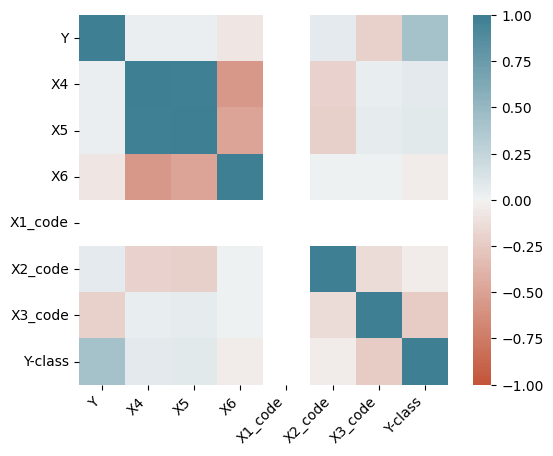

In [82]:
# Calculate correlation between columns and show the heat map
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Data exploration

In [83]:
df.describe()

,Y,X4,X5,X6,X1_code,X2_code,X3_code,Y-class
count,1995.000000,1995.000000,1995.000000,1995.000000,1995.0,1995.00000,1995.000000,1995.000000
mean,5853.522306,87.407331,111.003594,-34.522743,0.0,4.26416,4.234586,0.745363
std,8014.699598,13.840506,9.799072,28.323315,0.0,2.60331,2.837828,0.435766
min,0.000000,43.055556,78.333333,-123.777778,0.0,0.00000,0.000000,0.000000
25%,47.000000,78.305556,104.555556,-52.666667,0.0,3.00000,2.000000,0.000000
50%,1103.000000,87.500000,111.111111,-34.666667,0.0,4.00000,4.000000,1.000000
75%,5000.000000,97.722222,118.111111,-16.277778,0.0,6.00000,7.000000,1.000000
max,20000.000000,128.888889,142.777778,51.333333,0.0,9.00000,8.000000,1.000000


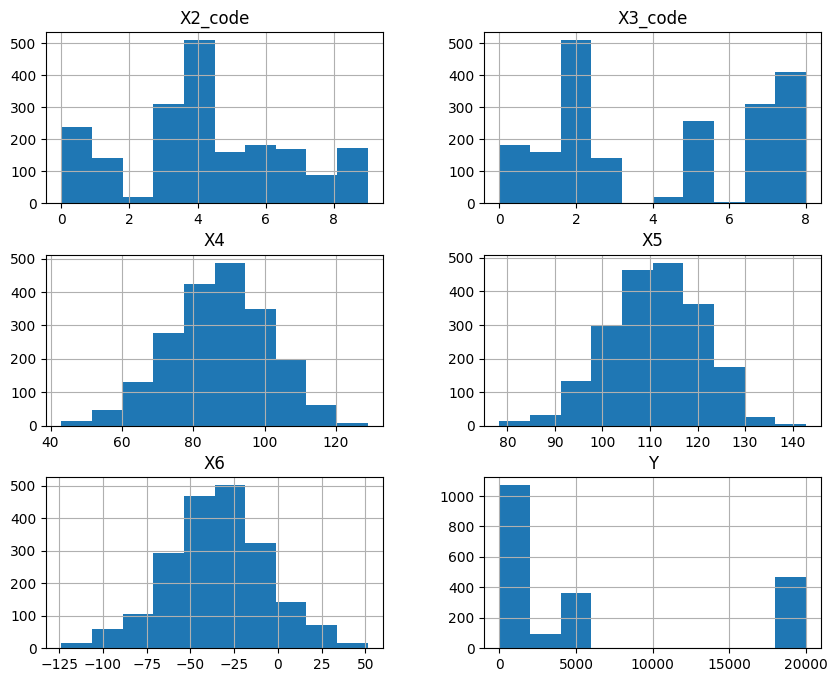

In [84]:
#Show histogram graph for each column
hist = df[["X2_code","X3_code","X4","X5","X6","Y"]].hist(figsize=(10, 8))

In [85]:
# display all unique values of X1
df.X1.unique(),df.X1.size

(array(['human'], dtype=object), 1995)

In [86]:
# display all unique values of X2
df.X2.unique(),df.X2.size

(array(['XSHSMRYFSTSVSWPGRGEPRFIAVGYVDDTQFVRFDSDAASPRGEPREPWVEQEGPEYWDRETQKYKRQAQADRVNLRKLRGYYNQSED',
        'XSHSMRYFSTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQTDRVSLRNLRGYYNQSEA',
        'XSHSMRYFDTAVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQADRVNLRKLRGYYNQSED',
        'XSHSMRYFDTAVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQNYKRQAQADRVSLRNLRGYYNQSED',
        'XSHSMRYFYTAVSRPGRGEPHFIAVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQTDRVSLRNLRGYYNQSEA',
        'XSHSMRYFYTAVSRPGRGEPRFIAVGYVDDTQFVQFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQTDRVNLRKLRGYYNQSEA',
        'XSHSMRYFDTAVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQADRVSLRNLRGYYNQSED',
        'XSHSMRYFYTAVSRPGRGEPRFIAVGYVDDTQFVQFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQTDRVSLRNLRGYYNQSEA',
        'XSHSMRYFYTAVSRPGRGEPHFIAVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQNYKRQAQTDRVNLRKLRGYYNQSEA',
        'XSHSMRYFYTAVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASPRGEPRAPWVEQEGPEYWDRETQKYKRQAQA

In [87]:
# display all unique values of X3
df.X3.unique(),df.X3.size

(array(['XSHTLQRMFGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAAREAEQRRAYLEGTCVEWLRRYLENGKETLQRA',
        'XSHTLQWMFGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAAREAEQRRAYLEGTCVEWLRRYLENGKETLQRA',
        'XSHTLQWMYGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAAREAEQWRAYLEGTCVEWLRRYLENGKETLQRA',
        'XSHTLQRMYGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAADTAAQITQRKLEAARAAEQLRAYLEGTCVEWLRRYLENGKETLQRA',
        'XSHIIQRMYGCDVGPDGRLLRGYDQYAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAAREAEQLRAYLEGLCVEWLRRYLKNGKETLQRA',
        'XSHTLQRMYGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAADKAAQITQRKWEAAREAEQRRAYLEGTCVEWLRRYLENGKKTLQRA',
        'XSHTLQRMSGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAADTAAQITQRKLEAARAAEQLRAYLEGTCVEWLRRYLENGKETLQRA',
        'XSHIIQRMYGCDLGPDGRLLRGHDQLAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAAREAEQLRAYLEGTCVEWLRRYLENGKETLQRA',
        'XSHTLQRMYGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAADTAAQITQRKWEAARTAEQLRAYLEGTCVEWLRRYLENRKKTLQRA'],
       dtype=object),
 1995)

# Classification models

Three models has been applied:
1. LogisticRegression
2. HistGradientBoostingClassifier
3. deep learning

## 1. LogisticRegression

### Featuer engineering
Apply one hot encoding on category columns and standard scaler on numerical columns

In [46]:
#define category columns and numerical columns
numerical_columns = ['X4', 'X5', 'X6']
categorical_columns = ['X1', 'X2', 'X3']

#Define encoding methods
categorical_preprocessor = OrdinalEncoder()

#Ordinal code on categorical columns and no encoding for the rest columns
preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

### Build model

In [93]:
model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OrdinalEncoder(),
                                                  ['X1', 'X2', 'X3'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [94]:
#Define model input features and output lable for training data
data_y = df["Y-class"]
data_x = df.drop(columns=["Y-class","Y","X1_code","X2_code","X3_code"])

In [95]:
#Split the dataset into two subset, train subset and test subtset
#The same train and test data will be used for all the classificiation models
x_train, x_test, y_train, y_test = train_test_split(
    data_x, data_y, random_state=123)

In [96]:
model.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OrdinalEncoder(),
                                                  ['X1', 'X2', 'X3'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

### Test and evaluate classificiation model

In [97]:
#Define the method to evaluate classification model
#All the classification models are evaluated using the same function
def classification_evaluation(y_test, y_predict, y_scores):
    conf_maxtrix = confusion_matrix(y_test, y_predict)
    auc = roc_auc_score(y_test,y_scores)
    
    #print the metrics results
    print (f"Confusion Matrix: \r\n {conf_maxtrix}")
    print(f"Accuracy:{accuracy_score(y_test, y_predict)}")
    print(f"AUC: {str(auc)}")
    print(f"Overall Precision:{precision_score(y_test, y_predict)}")
    print(f"Overall Recall:{recall_score(y_test, y_predict)}")
    print("Classification report")
    print(classification_report(y_test, y_predict))
    #Calculate ROC curve
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)

    #Plot ROC curve
    fig = plt.figure(figsize=(4, 4))
    #Plot the diagonal line
    plt.plot([0, 1], [0, 1], 'k--')
    #Plot the false/true positive rate
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.show()
    return false_positive_rate, true_positive_rate

In [98]:
#Predict on test data
y_predict=model.predict(x_test)
y_scores = model.predict_proba(x_test)

Confusion Matrix: 
 [[  5 113]
 [  7 374]]
Accuracy:0.7595190380761523
AUC: 0.654099381645091
Overall Precision:0.7679671457905544
Overall Recall:0.9816272965879265
Classification report
              precision    recall  f1-score   support

           0       0.42      0.04      0.08       118
           1       0.77      0.98      0.86       381

    accuracy                           0.76       499
   macro avg       0.59      0.51      0.47       499
weighted avg       0.68      0.76      0.68       499



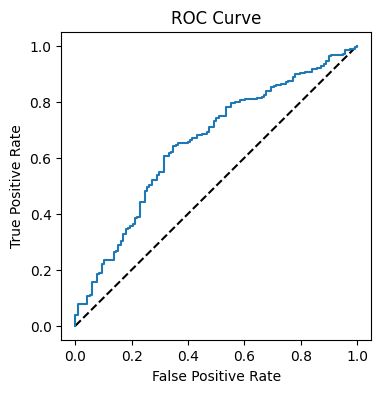

In [99]:
#Evaluate results
fpr_linear,tpr_linear=classification_evaluation(y_test,y_predict,y_scores[:,1])

## 2. HistGradientBoostingClassifier

### Featuer engineering

In [100]:
#Define encoding methods
categorical_preprocessor = OrdinalEncoder()

#Ordinal code on categorical columns and no encoding for the rest columns
preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

### Build model

In [101]:
x_train

,X1,X2,X3,X4,X5,X6
1234,human,XSHSMRYFDTAVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPRGE...,XSHTLQRMSGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAA...,90.000000,110.666667,-65.222222
406,human,XSHSMRYFSTSVSWPGRGEPRFIAVGYVDDTQFVRFDSDAASPRGE...,XSHTLQRMFGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAA...,87.055556,113.666667,-28.888889
1461,human,XSHSMRYFSTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASPRGE...,XSHTLQWMFGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAA...,108.555556,124.888889,-52.222222
1039,human,XSHSMRYFDTAVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPRGE...,XSHTLQWMYGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAA...,126.500000,139.000000,-59.333333
1940,human,XSHSMRYFYTAVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASPRGE...,XSHTLQWMYGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAA...,75.000000,103.666667,-38.888889
...,...,...,...,...,...,...
1122,human,XSHSMRYFDTAVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPRGE...,XSHTLQWMYGCDLGPDGRLLRGYDQSAYDGKDYIALNEDLRSWTAA...,60.222222,91.111111,12.000000
1346,human,XSHSMRYFYTAVSRPGRGEPRFIAVGYVDDTQFVQFDSDAASPRGE...,XSHTLQRMYGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAA...,89.000000,110.222222,-51.444444
1406,human,XSHSMRYFYTAVSRPGRGEPRFIAVGYVDDTQFVQFDSDAASPRGE...,XSHTLQRMYGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAA...,87.111111,110.888889,-24.555556
1389,human,XSHSMRYFYTAVSRPGRGEPRFIAVGYVDDTQFVQFDSDAASPRGE...,XSHTLQRMYGCDLGPDGRLLRGYNQFAYDGKDYIALNEDLRSWTAA...,109.000000,123.888889,-83.888889


In [102]:
model = make_pipeline(preprocessor, HistGradientBoostingClassifier())
model.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OrdinalEncoder(),
                                                  ['X1', 'X2', 'X3'])])),
                ('histgradientboostingclassifier',
                 HistGradientBoostingClassifier())])

Confusion Matrix: 
 [[ 55  63]
 [ 43 338]]
Accuracy:0.7875751503006012
AUC: 0.7878464344499312
Overall Precision:0.8428927680798005
Overall Recall:0.8871391076115486
Classification report
              precision    recall  f1-score   support

           0       0.56      0.47      0.51       118
           1       0.84      0.89      0.86       381

    accuracy                           0.79       499
   macro avg       0.70      0.68      0.69       499
weighted avg       0.78      0.79      0.78       499



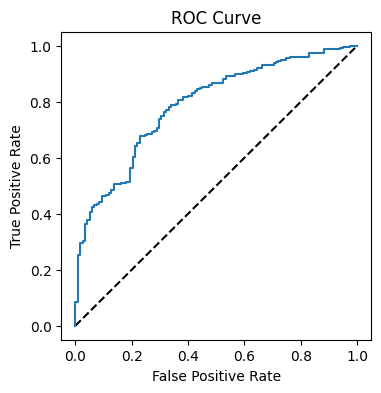

In [103]:
#Predict on test data
y_predict=model.predict(x_test)
y_scores = model.predict_proba(x_test)
#Evaluate the results
fpr_hbg,tpr_hbg=classification_evaluation(y_test,y_predict,y_scores[:,1])

## 3. Deep learning model

In [104]:
#Define method for feature engineering
def process_attributes(df, train, test):
    numerical_columns = ['X4', 'X5', 'X6']
    #scaler for numerical columns
    scaler = StandardScaler() #MinMaxScaler()
    train_numericals = scaler.fit_transform(train[numerical_columns])
    test_numericals = scaler.transform(test[numerical_columns])
    
    # one-hot encoding for categorical columns
    x1_binarizer = LabelBinarizer().fit(df["X1"])
    x1_train_categorical = x1_binarizer.transform(train["X1"])
    x1_test_categorical = x1_binarizer.transform(test["X1"])
    
    x2_binarizer = LabelBinarizer().fit(df["X2"])
    x2_train_categorical = x2_binarizer.transform(train["X2"])
    x2_test_categorical = x2_binarizer.transform(test["X2"])
    
    x3_binarizer = LabelBinarizer().fit(df["X3"])
    x3_train_categorical = x3_binarizer.transform(train["X3"])
    x3_test_categorical = x3_binarizer.transform(test["X3"])
    
    #Concatenating all the features together
    train_x = np.hstack([x1_train_categorical, x2_train_categorical, x3_train_categorical, train_numericals])
    test_x = np.hstack([x1_test_categorical, x2_test_categorical, x3_test_categorical, test_numericals])
    return train_x, test_x

In [105]:
x_train_nor,x_test_nor=process_attributes(df, x_train, x_test)

In [106]:
#Define the deep learning model
model = Sequential()
#One hidden layer with 20 hidden neurons
model.add(Dense(20, input_dim=x_train_nor.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])
#Train the model on the dataset
model.fit(x_train_nor, y_train.values, epochs=100, batch_size=16, verbose=2)

Epoch 1/100
94/94 - 0s - loss: 0.6474 - auc: 0.6087
Epoch 2/100
94/94 - 0s - loss: 0.5380 - auc: 0.7198
Epoch 3/100
94/94 - 0s - loss: 0.5002 - auc: 0.7569
Epoch 4/100
94/94 - 0s - loss: 0.4833 - auc: 0.7702
Epoch 5/100
94/94 - 0s - loss: 0.4726 - auc: 0.7795
Epoch 6/100
94/94 - 0s - loss: 0.4667 - auc: 0.7858
Epoch 7/100
94/94 - 0s - loss: 0.4620 - auc: 0.7919
Epoch 8/100
94/94 - 0s - loss: 0.4599 - auc: 0.7939
Epoch 9/100
94/94 - 0s - loss: 0.4579 - auc: 0.7964
Epoch 10/100
94/94 - 0s - loss: 0.4568 - auc: 0.7977
Epoch 11/100
94/94 - 0s - loss: 0.4556 - auc: 0.8002
Epoch 12/100
94/94 - 0s - loss: 0.4540 - auc: 0.8022
Epoch 13/100
94/94 - 0s - loss: 0.4535 - auc: 0.8017
Epoch 14/100
94/94 - 0s - loss: 0.4525 - auc: 0.8032
Epoch 15/100
94/94 - 0s - loss: 0.4513 - auc: 0.8061
Epoch 16/100
94/94 - 0s - loss: 0.4514 - auc: 0.8044
Epoch 17/100
94/94 - 0s - loss: 0.4506 - auc: 0.8057
Epoch 18/100
94/94 - 0s - loss: 0.4491 - auc: 0.8072
Epoch 19/100
94/94 - 0s - loss: 0.4492 - auc: 0.8075
Ep

Confusion Matrix: 
 [[ 52  66]
 [ 31 350]]
Accuracy:0.8056112224448898
AUC: 0.8219671693580676
Overall Precision:0.8413461538461539
Overall Recall:0.9186351706036745
Classification report
              precision    recall  f1-score   support

           0       0.63      0.44      0.52       118
           1       0.84      0.92      0.88       381

    accuracy                           0.81       499
   macro avg       0.73      0.68      0.70       499
weighted avg       0.79      0.81      0.79       499



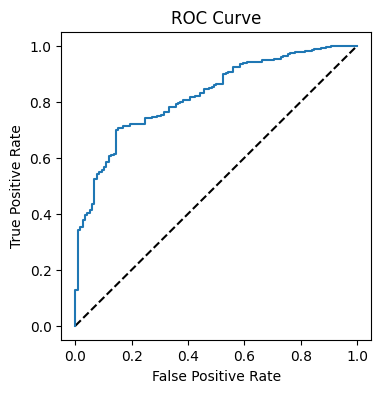

In [107]:
#Test the model on test data
y_scores=model.predict(x_test_nor)
y_predict=[0 if i<0.5 else 1 for i in y_scores]
fpr_deep,tpr_deep=classification_evaluation(y_test,y_predict,y_scores)

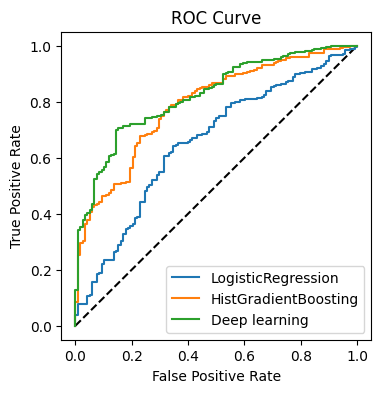

In [108]:
#Compare all the ROC curves
#Plot ROC curve
fig = plt.figure(figsize=(4, 4))
#Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--')
#Plot the false/true positive rate
plt.plot(fpr_linear, tpr_linear, label='LogisticRegression')
plt.plot(fpr_hbg, tpr_hbg, label='HistGradientBoosting')
plt.plot(fpr_deep, tpr_deep, label='Deep learning')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

# Regression models

Three models has been applied:
1. Linear regression
2. Gradient Boosting
3. Deep learning

## 1. Linear regression

### Featuer engineering

In [121]:
#Define encoding methods
categorical_preprocessor = OrdinalEncoder()

#Ordinal code on categorical columns and no encoding for the rest columns
preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

### Build model

In [122]:
model = make_pipeline(preprocessor, LinearRegression())
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OrdinalEncoder(),
                                                  ['X1', 'X2', 'X3'])])),
                ('linearregression', LinearRegression())])

In [123]:
#Define model input features and output lable for training data
data_y = df["Y"]
data_x = df.drop(columns=["Y-class","Y","X1_code","X2_code","X3_code"])

In [124]:
#Split the dataset into two subset, train subset and test subtset
#The same train and test data will be used for all the regression models
x_train, x_test, y_train, y_test = train_test_split(
    data_x, data_y, random_state=123)

In [125]:
model.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OrdinalEncoder(),
                                                  ['X1', 'X2', 'X3'])])),
                ('linearregression', LinearRegression())])

### Test and evaluate model

In [126]:
def regression_evaluation(y_test, y_predict):
    mse = mean_squared_error(y_test, y_predict)
    print("MSE:", mse)
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)
    r2 = r2_score(y_test, y_predict)
    print("R2:", r2)
    plt.scatter(y_test, y_predict)
    plt.show()

In [127]:
y_predict = model.predict(x_test)

MSE: 62237684.19143894
RMSE: 7889.086397767421
R2: 0.014653891988159584


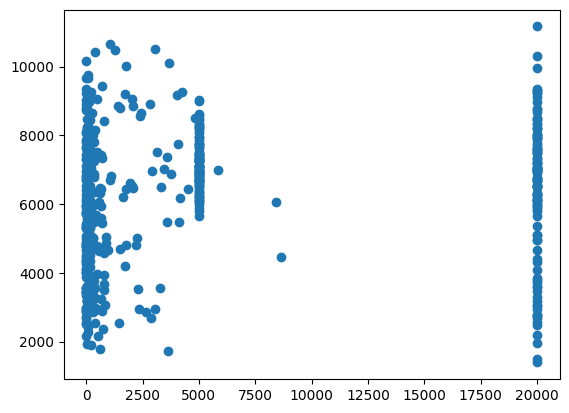

In [128]:
regression_evaluation(y_test, y_predict)

## 2. GradientBoostingRegressor

### Featuer engineering

In [129]:
categorical_preprocessor = OrdinalEncoder()

preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

### Build model

In [130]:
model = make_pipeline(preprocessor, GradientBoostingRegressor())
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OrdinalEncoder(),
                                                  ['X1', 'X2', 'X3'])])),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [131]:
model.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OrdinalEncoder(),
                                                  ['X1', 'X2', 'X3'])])),
                ('gradientboostingregressor', GradientBoostingRegressor())])

### Test and evaluate model

MSE: 54136438.98497468
RMSE: 7357.746868775433
R2: 0.14291268789202738


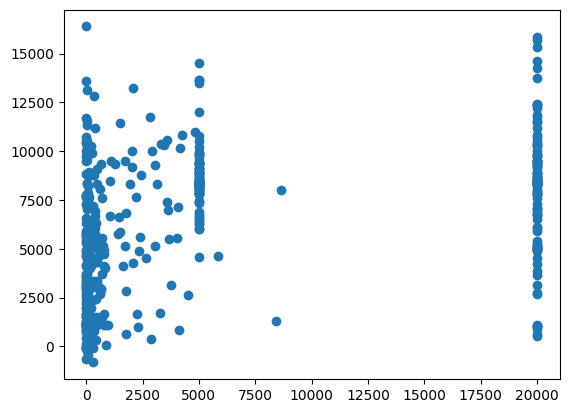

In [132]:
y_predict = model.predict(x_test)
regression_evaluation(y_test, y_predict)

## 3. Deep learning

In [133]:
#Feature engineering
x_train_nor,x_test_nor=process_attributes(df, x_train, x_test)

In [134]:
#Build the model
model = Sequential()
model.add(Dense(20, input_dim=x_train_nor.shape[1], activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))
#Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
#Train the model
model.fit(x_train_nor, y_train.values, epochs=200, batch_size=16, verbose=2)

Epoch 1/200
94/94 - 0s - loss: 99012424.0000 - mae: 5870.6919
Epoch 2/200
94/94 - 0s - loss: 98925224.0000 - mae: 5865.6631
Epoch 3/200
94/94 - 0s - loss: 98554536.0000 - mae: 5847.2026
Epoch 4/200
94/94 - 0s - loss: 97599992.0000 - mae: 5810.4561
Epoch 5/200
94/94 - 0s - loss: 95853592.0000 - mae: 5759.0562
Epoch 6/200
94/94 - 0s - loss: 93146904.0000 - mae: 5700.6299
Epoch 7/200
94/94 - 0s - loss: 89474072.0000 - mae: 5641.1216
Epoch 8/200
94/94 - 0s - loss: 85053672.0000 - mae: 5577.8706
Epoch 9/200
94/94 - 0s - loss: 80178528.0000 - mae: 5514.0195
Epoch 10/200
94/94 - 0s - loss: 75209600.0000 - mae: 5469.9062
Epoch 11/200
94/94 - 0s - loss: 70449592.0000 - mae: 5409.9170
Epoch 12/200
94/94 - 0s - loss: 66144068.0000 - mae: 5365.2114
Epoch 13/200
94/94 - 0s - loss: 62616488.0000 - mae: 5378.5176
Epoch 14/200
94/94 - 0s - loss: 59898980.0000 - mae: 5552.6411
Epoch 15/200
94/94 - 0s - loss: 57884980.0000 - mae: 5721.7769
Epoch 16/200
94/94 - 0s - loss: 56490916.0000 - mae: 5834.8311
E

Epoch 131/200
94/94 - 0s - loss: 51550220.0000 - mae: 5643.9624
Epoch 132/200
94/94 - 0s - loss: 51544628.0000 - mae: 5679.5864
Epoch 133/200
94/94 - 0s - loss: 51535856.0000 - mae: 5663.7446
Epoch 134/200
94/94 - 0s - loss: 51535456.0000 - mae: 5659.9941
Epoch 135/200
94/94 - 0s - loss: 51533048.0000 - mae: 5665.6416
Epoch 136/200
94/94 - 0s - loss: 51534448.0000 - mae: 5660.0049
Epoch 137/200
94/94 - 0s - loss: 51531596.0000 - mae: 5668.8989
Epoch 138/200
94/94 - 0s - loss: 51540312.0000 - mae: 5671.2588
Epoch 139/200
94/94 - 0s - loss: 51531508.0000 - mae: 5651.4463
Epoch 140/200
94/94 - 0s - loss: 51530712.0000 - mae: 5662.2427
Epoch 141/200
94/94 - 0s - loss: 51529120.0000 - mae: 5667.3276
Epoch 142/200
94/94 - 0s - loss: 51526108.0000 - mae: 5663.0474
Epoch 143/200
94/94 - 0s - loss: 51540024.0000 - mae: 5664.0205
Epoch 144/200
94/94 - 0s - loss: 51528892.0000 - mae: 5659.9092
Epoch 145/200
94/94 - 0s - loss: 51527176.0000 - mae: 5655.9976
Epoch 146/200
94/94 - 0s - loss: 5153830

### Test and evaluate model

MSE: 53845597.48997955
RMSE: 7337.955947672318
R2: 0.14751728619713622


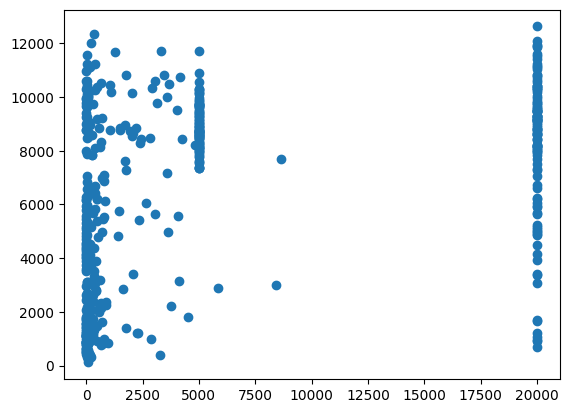

In [135]:
y_predict=model.predict(x_test_nor)
regression_evaluation(y_test, y_predict)